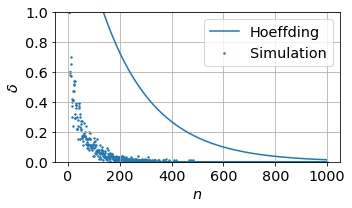

In [2]:
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 3),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


##############################################################

epsilon = 0.05
populationRisk = 0.1

##############################################################


trials = 100
nMax = 1000

delta = np.zeros(nMax)
bound = np.zeros(nMax)

for n in range(1,nMax):

    #GENERATE BINARY VALUES, TO SIMULATE THE EMPIRICAL OBSERVATION
    A = np.random.binomial(1, populationRisk, (n,trials))

    #CALCULATE THE EMPIRICAL RISK FOR EACH OF THE TRIALS
    empiricalRisk = np.mean(A,axis=0)

    #MEASURE HOW MANY OF OUR TRIALS WERE OUTSIDE THE TOLERANCE ZONE, EPSILON
    delta[n] = np.average( abs(empiricalRisk-populationRisk) > epsilon )

    #CALCULATE WHAT HOEFFDING SAYS
    bound[n] = 2*np.exp(-2*n*epsilon**2)

plt.plot( bound[2:] , label='Hoeffding')
plt.scatter(range(2,nMax,1), delta[2:], s=2, label='Simulation')

plt.ylim([0,1])
plt.legend()
plt.grid(True)
plt.ylabel('$\delta$')
plt.xlabel('$n$')

plt.tight_layout()
